In [2]:
!pip install pandas scikit-learn pyreadstat seaborn matplotlib

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [4]:
url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
df = pd.read_stata(url)

print(df.head())

   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [6]:
df = pd.get_dummies(df, columns=['rank'], drop_first=True)


In [7]:
X = df.drop('admit', axis=1)
y = df['admit']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6625
Confusion Matrix:
 [[48  5]
 [22  5]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.91      0.78        53
         1.0       0.50      0.19      0.27        27

    accuracy                           0.66        80
   macro avg       0.59      0.55      0.53        80
weighted avg       0.62      0.66      0.61        80



<Axes: xlabel='Predicted', ylabel='Actual'>

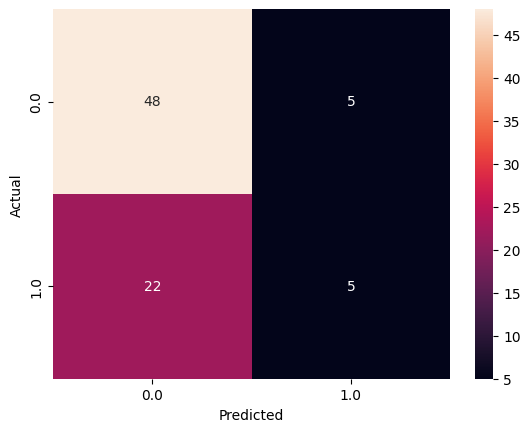

In [18]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted' ])
sns.heatmap(conf_mat, annot=True)